# Introduction to Exploratory Data Analysis with Matplotlib and Seaborn
In this part we are going to focus on a [quick exploration](https://en.wikipedia.org/wiki/Exploratory_data_analysis) of the data, according to their type and number.

For simplicity we will talk about two main data kind:
- categorical: i.e., a finite list of discrete values which may or may not have a specific order e.g., `yellow`, `red`, `blue`
- continuous: i.e. numerical values (most often belonging to R) usually represented with a `float` computer type

Jupyter and pandas allow you to easily interact with the data and perform operations and visualization.

### Installing basic libraries
Execute the following cell only if you need to install the seaborn library

In [ ]:
!pip install --upgrade matplotlib seaborn

The following libraries are the foundation tools:

- **pandas** is an in-memory dataframe library
- **matplotlib** is a plotting library inspired by matlab plotting API
- **seaborn** is a chart library based on matplotlib, with more functionalities and themes
- **numpy** is a numeric calculation library providing fast c arrays and scientific functions

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 6)
pd.set_option('display.float_format', "{:.2g}".format)

## Bird's eye view of a dataset with Describe
let's start with a classic dataset including the passengers of Titanic ship.

The `read_csv` function uploads this format in a pandas `DataFrame` which is a relation

Note: the titanic dataset was downloaded at the beginning of Part 2; in case you missing it execute the code at the beginning of the lesson

The `.head()` method returns the first lines of your data frame to quickly inspect it

In [12]:
titanic = pd.read_csv("datasets/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
0,1,0,3,...,7.2,NaN,S
1,2,1,1,...,71,C85,C
2,3,1,3,...,7.9,NaN,S
3,4,1,1,...,53,C123,S
4,5,0,3,...,8.1,NaN,S


the `.describe()` method returns basic statistics for all numerical columns
- min
- max
- median
- mean
- quartiles
- count of elements

by using the `.describe(include="all")` option also categorical values are shown with some other statistics:
- number of unique discrete values
- the most common one
- its frequency

In [13]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
count,8.9e+02,8.9e+02,8.9e+02,...,8.9e+02,204,889
unique,NaN,NaN,NaN,...,NaN,147,3
top,NaN,NaN,NaN,...,NaN,G6,S
freq,NaN,NaN,NaN,...,NaN,4,644
mean,4.5e+02,0.38,2.3,...,32,NaN,NaN
std,2.6e+02,0.49,0.84,...,50,NaN,NaN
min,1,0,1,...,0,NaN,NaN
25%,2.2e+02,0,2,...,7.9,NaN,NaN
50%,4.5e+02,0,3,...,14,NaN,NaN
75%,6.7e+02,1,3,...,31,NaN,NaN


It is possible to access columns (called `Series` in pandas jargon) using the square bracket operator
```python
titanic["Pclass"]
```

columns whose name is a good python identifier (i.e. starts with a letter and contains only letters, numbers and underscore) can be accessed using the dot notation e.g.
```python
titanic.Pclass
```

each column has a data type, as `csv` do not carry any type information, this is inferred when loading; other binary data format also include a data type. The datas type of a column is saved in the `.dtype` attribute

In [14]:
pclass = titanic.Pclass
pclass.dtype

dtype('int64')

we know this column represents the class of the ticket so we expect it to have a finite number of actual values: we can check it with the `.unique()` method

In [15]:
pclass.unique()

array([3, 1, 2])

we see this is a discrete valued columns so we can transform its type with the `.astype()` method

In [16]:
pclass = pclass.astype('category')
pclass.dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64)

Now the statistics are represented differently for pClass

In [17]:
titanic["pClass"] = pclass
titanic.describe(include="all")

,PassengerId,Survived,Pclass,...,Cabin,Embarked,pClass
count,8.9e+02,8.9e+02,8.9e+02,...,204,889,8.9e+02
unique,NaN,NaN,NaN,...,147,3,3
top,NaN,NaN,NaN,...,G6,S,3
freq,NaN,NaN,NaN,...,4,644,4.9e+02
mean,4.5e+02,0.38,2.3,...,NaN,NaN,NaN
std,2.6e+02,0.49,0.84,...,NaN,NaN,NaN
min,1,0,1,...,NaN,NaN,NaN
25%,2.2e+02,0,2,...,NaN,NaN,NaN
50%,4.5e+02,0,3,...,NaN,NaN,NaN
75%,6.7e+02,1,3,...,NaN,NaN,NaN


If we know in advance about the type of a column we can give some hint to the csv reader

In [18]:
titanic = pd.read_csv(
    "datasets/titanic.csv",
    dtype={
        "Survived":"category",
        "Pclass":"category",
        "Sex":"category",
    }
)

## Monovariate Categorical
When we have a category series we can list all of the possible values using the `.cat.categories` attribute

In [19]:
pclass.cat.categories

Index([1, 2, 3], dtype='int64')

the `sns.countplot()` function show a bar plot of categorical values

<Axes: xlabel='count', ylabel='Pclass'>

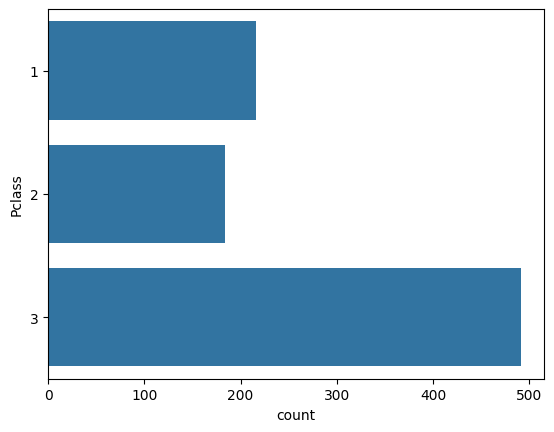

In [20]:
sns.countplot(pclass)

## Monovariate Continuous

this dataframe collects pollutant density in California

In [21]:
california = pd.read_csv("california_pb_2023.csv")
california.describe(include="all")

,Date,Source,Site ID,...,County,Site Latitude,Site Longitude
count,1110,1110,1.1e+03,...,1110,1.1e+03,1.1e+03
unique,110,1,NaN,...,13,NaN,NaN
top,03/25/2023,AQS,NaN,...,Los Angeles,NaN,NaN
freq,27,1110,NaN,...,458,NaN,NaN
mean,NaN,NaN,6.1e+07,...,NaN,35,-1.2e+02
std,NaN,NaN,2.3e+05,...,NaN,1.7,1.6
min,NaN,NaN,6e+07,...,NaN,33,-1.2e+02
25%,NaN,NaN,6e+07,...,NaN,34,-1.2e+02
50%,NaN,NaN,6e+07,...,NaN,34,-1.2e+02
75%,NaN,NaN,6.1e+07,...,NaN,34,-1.2e+02


`sns.histplot` shows an histogram

<Axes: xlabel='Daily Mean Pb Concentration', ylabel='Count'>

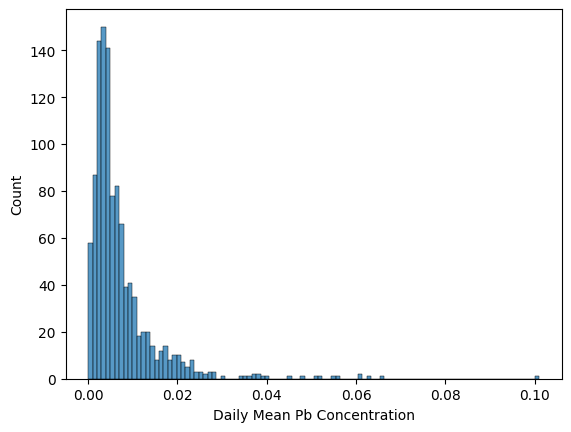

In [22]:
sns.histplot(california,x="Daily Mean Pb Concentration")

This distribution looks like a lognormal distribution, let's show a cumulative distribution and plot it with a logaritmic x axis

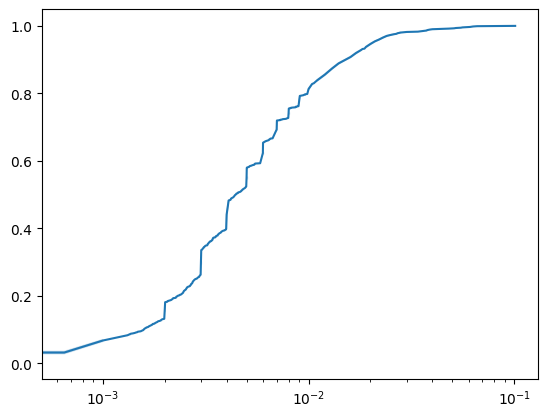

In [23]:
sorted_pb = np.sort(california["Daily Mean Pb Concentration"])
prob_pb = (np.arange(len(sorted_pb)) + 1)/len(sorted_pb)
ax=sns.lineplot(x=sorted_pb, y=prob_pb)
ax.set_xscale("log", base=10)

This looks nice so we can check by fitting a quantile plot

First we try with a normal quantile, we expect some queues

((array([-3.22755646, -2.96462357, -2.81804229, ...,  2.81804229,
          2.96462357,  3.22755646]),
  array([0.   , 0.   , 0.   , ..., 0.063, 0.066, 0.101])),
 (np.float64(0.00643636211953321),
  np.float64(0.006990054054054056),
  np.float64(0.7905697147984767)))

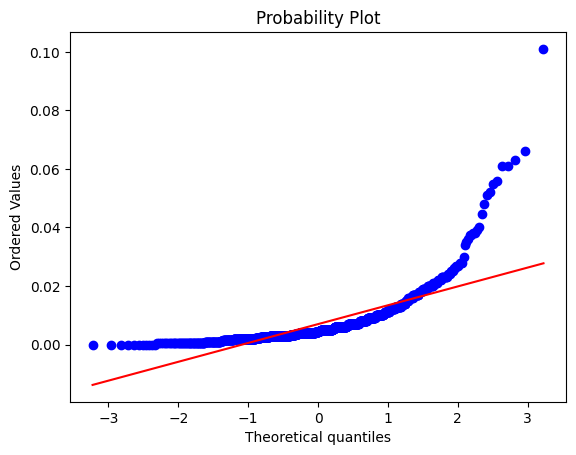

In [24]:
from scipy import stats
stats.probplot(california["Daily Mean Pb Concentration"], plot=sns.mpl.pyplot)

We can fit it with a different distribution, so we choose a lognormal

((array([ 0.03965428,  0.05157988,  0.05972275, ..., 16.74403862,
         19.38740395, 25.21796064]),
  array([0.   , 0.   , 0.   , ..., 0.063, 0.066, 0.101])),
 (np.float64(0.003939895241111014),
  np.float64(0.0005278739893580433),
  np.float64(0.9962402345363333)))

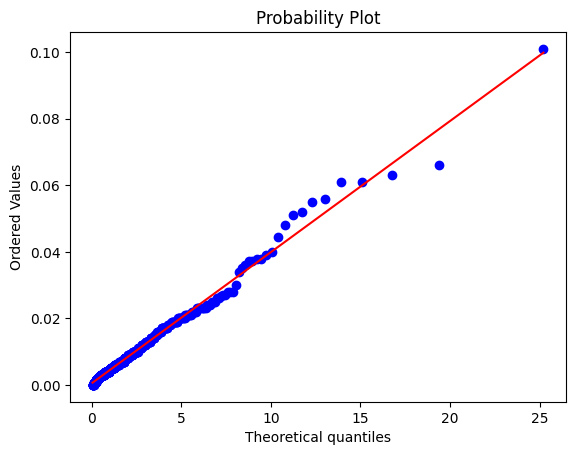

In [25]:
stats.probplot(california["Daily Mean Pb Concentration"], plot=sns.mpl.pyplot,dist=stats.distributions.lognorm(s=1))

this looks quite better

## Multivariate Categorical
let's consider a group of categorical variables and explore their interaction, the `pd.crosstab()` function provides a way to create a contingency table i.e. a table which counts all combination of the considered factors 

In [26]:
titanic['survived'] = titanic.Survived.astype('category')
titanic['sex'] = titanic.Sex.astype('category')
titanic['pclass'] = titanic.Pclass.astype('category')

In [27]:
ct = pd.crosstab(titanic['survived'],columns=[titanic['sex'],titanic['pclass']])
ct

sex      female         male         
pclass        1   2   3    1   2    3
survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

the `.plot.bar()` method provides a quick way to display this information as grouped bar plot

<Axes: xlabel='survived'>

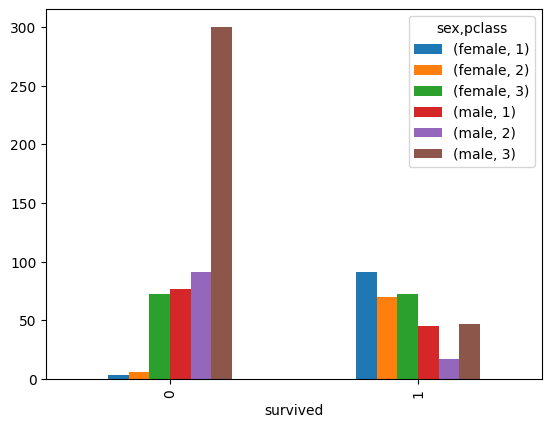

In [28]:
ct.plot.bar()

<Axes: xlabel='survived'>

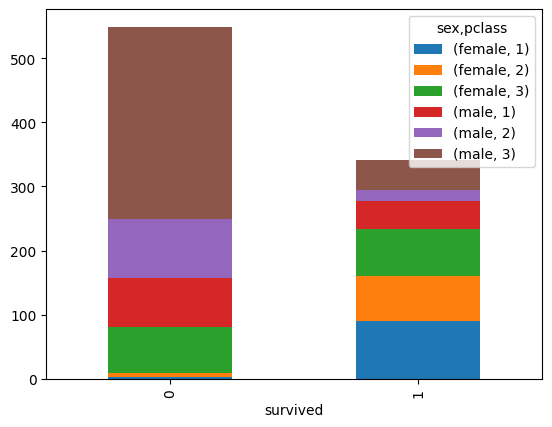

In [29]:
ct.plot.bar(stacked=True)

## Multivariate Continuous
the `iris` dataset is a collection of measurements of this flower's features (sepal and petal length and width) across different varieties.

In [30]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5,3.6,1.4,0.2,Setosa


### Two variables
the simplest way to look at the interaction between two of these features is the scatter plot

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

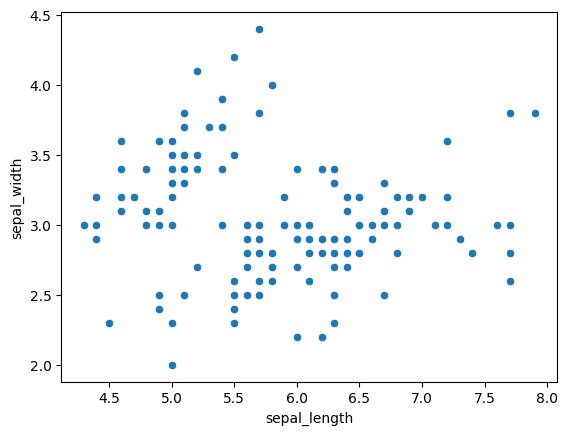

In [31]:
sns.scatterplot(iris,x="sepal_length",y="sepal_width")

### Many variables
the same can be done with all the features in a large simmetric matrix.

In the diagonal are plotted histograms of the corresponding feature

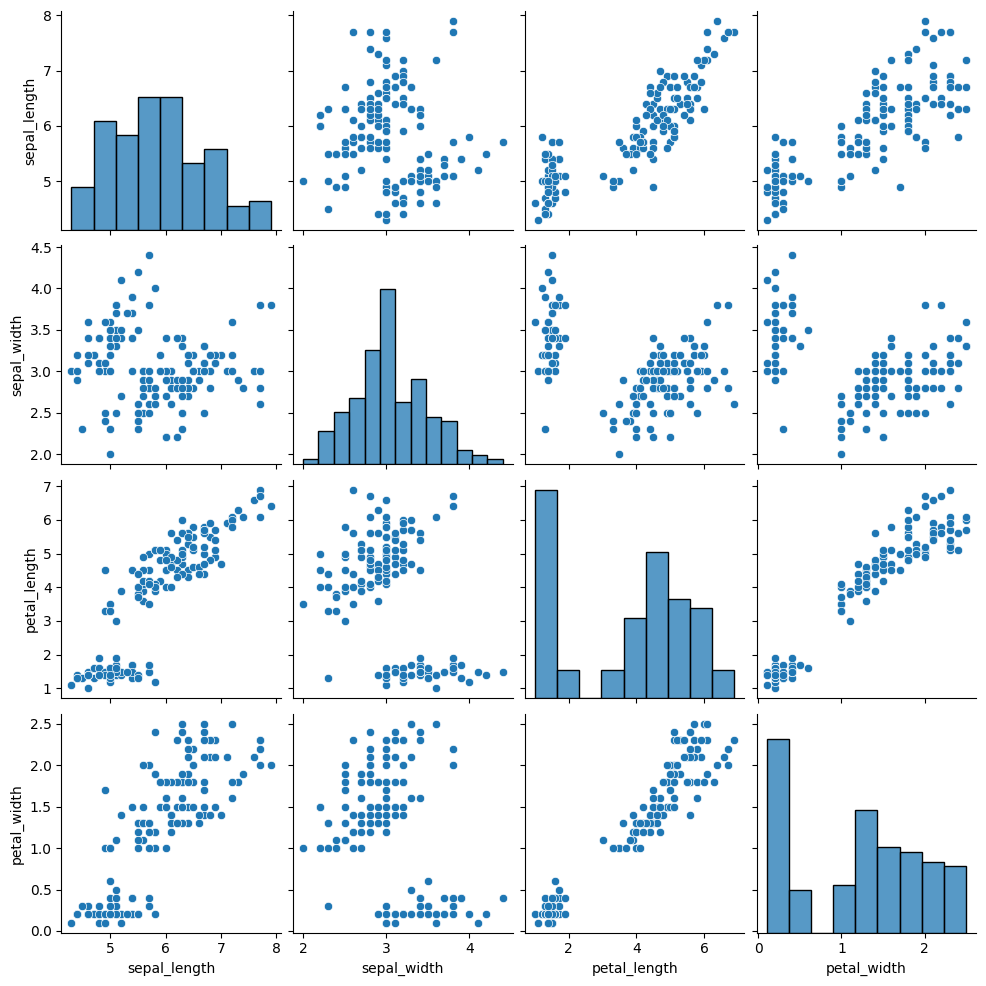

In [32]:
sns.pairplot(iris)

## Multivariate Mixed

### One continuous variable against a one categorical variable
box plots present a graphical synopsis of distributions grouped by a category
- the middle line represent the median
- the top and bottom line of the box represent the 25th and 75th percentiles od the distribution
- the top and bottom whiskers are usually calculated in this way:
  1. select the most extreme sample value
  2. calculate the interquartile range i.e. the distance between the 25th and 75th percentiles
  3. multiply the interquartile range by 1.5 and sum to (or respectively subtract from) the median
  4. between the most extreme value and the value calculated at point 3 choose the one which is nearest to the median
- if the calculated value is chosen all samples which are farther from the mean are plotted as dot and may be interpreted as outliers

<Axes: xlabel='pclass', ylabel='Age'>

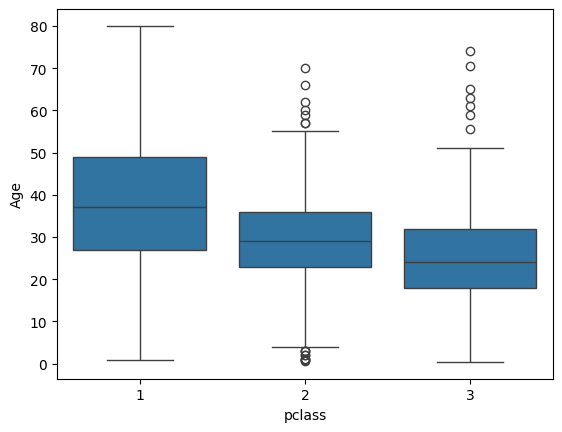

In [33]:
sns.boxplot(titanic,x="pclass",y="Age")

violin plots also show a smooth curve representng a continuous distribution calculated with kernel smoothing.

This provides more visual information than box plot but may be effectively used only when the number of groups is limited

<Axes: xlabel='pclass', ylabel='Age'>

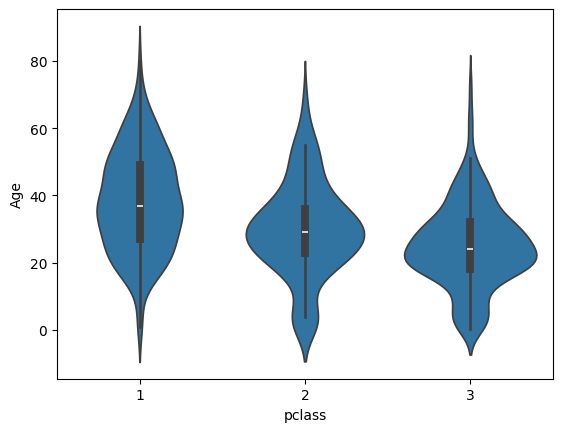

In [34]:
sns.violinplot(titanic,x="pclass",y="Age")

### Many continuous variables against one categorical variable
the scatter matrix can show groups from a single category using colors

The seaborn version also shows kernel density distributons

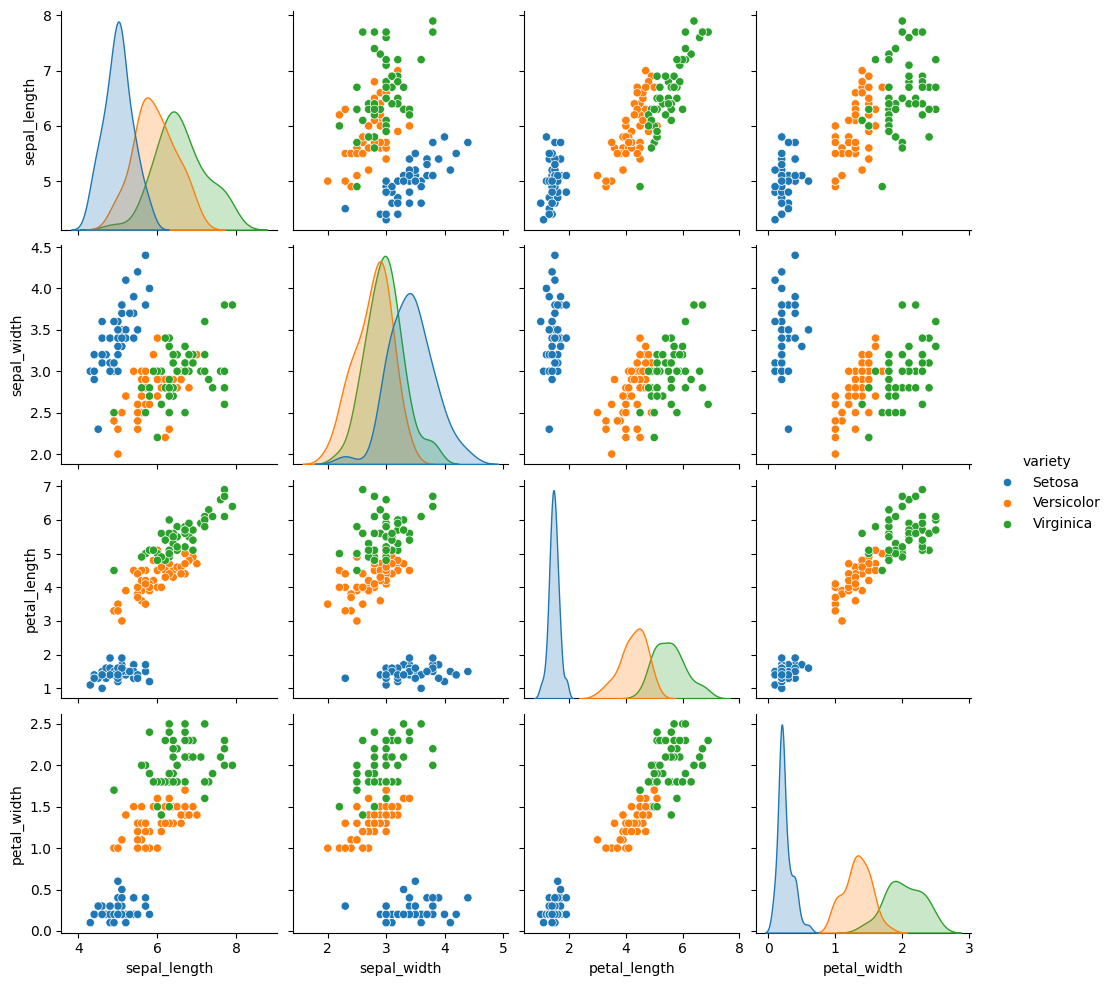

In [35]:
sns.pairplot(iris,hue="variety")

### Many categorical variables against one or more continuous variables
When dealing with multiple categorical variable is also possible to define a bidimensional grid.

A plotting function can be applied on each subset represented in a given cell grid

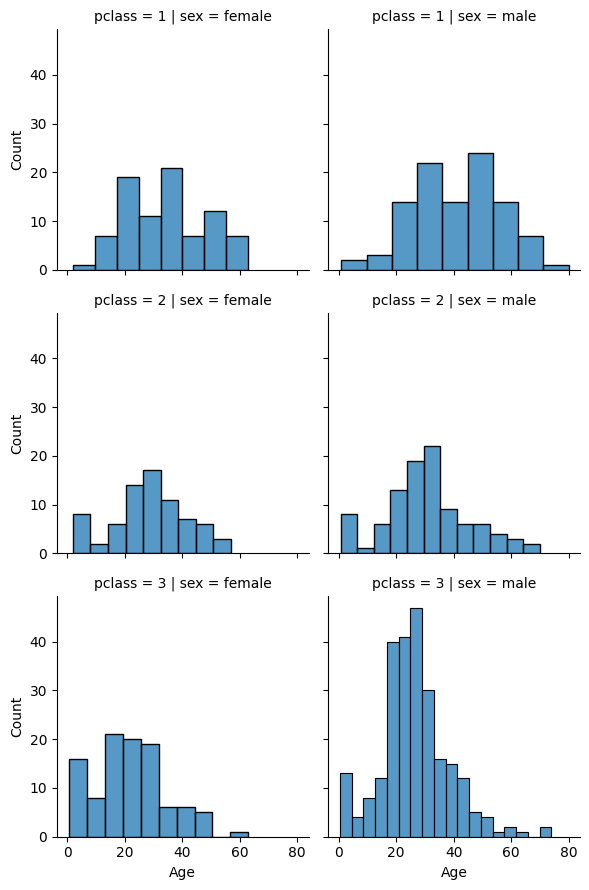

In [36]:
g = sns.FacetGrid(titanic, col="sex", row='pclass')
g.map(sns.histplot, "Age")

interestingly this representation shows the different age distribution as a function of the gender and the class of passengers